In [276]:
import pandas as pd
import scipy.io
import os
import numpy as np
import math

## Get data from tar files

In [277]:
wiki = scipy.io.loadmat('wiki_crop/wiki.mat')['wiki'][0][0]
imdb = scipy.io.loadmat('imdb_crop/imdb.mat')['imdb'][0][0]


Citation

@article{Rothe-IJCV-2018,
  author = {Rasmus Rothe and Radu Timofte and Luc Van Gool},
  title = {Deep expectation of real and apparent age from a single image without facial landmarks},
  journal = {International Journal of Computer Vision},
  volume={126},
  number={2-4},
  pages={144--157},
  year={2018},
  publisher={Springer}
}

### Get necessary variables

For questions 2 and 3, we only need age and gender.

In [278]:
def get_df(data, length):
    ## create empty lists for gender and birth year and year photo was taken
    gender = []
    year_birth = []
    year_taken = []
    age = []
    
    for i in range(length):
        g = data[3][0][i]   ## get gender  (1- male, 0- female)
        y =  math.floor(int(data[0][0][i])/365)  ## divide by 365 to get year
        t = data[1][0][i]

        
        ## append to list
        gender.append(g)
        year_birth.append(y)
        year_taken.append(t)
                                                
    
    ## create dataframe
    df = pd.DataFrame()
    df['gender'] = gender
    df['birth_year'] = year_birth
    ## clean birth year variable
    df['birth_year'][df['birth_year'] < 1900]= np.nan
    
    df['taken_year'] = year_taken
    df['age'] = df['taken_year'] - df['birth_year']  ## create age variable = current year - birth year
    ## clean age variable
    df['age'][df['age'] < 0]= np.nan


    
    return df

In [279]:
wiki_df = get_df(wiki, 62328)
imdb_df = get_df(imdb, 460723)

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Append datasets

In [280]:
full_df = wiki_df.append(imdb_df)
full_df = full_df.reset_index()
del full_df['index']

### plotting age distributions

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


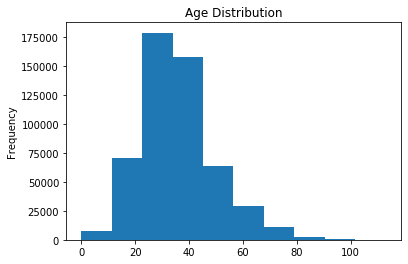

In [281]:
import matplotlib.pyplot as plt


plt.hist(full_df['age'], bins=10)
plt.gca().set(title='Age Distribution', ylabel='Frequency');


In [282]:
bins = [15, 25]
full_df['age'].value_counts(bins=bins, sort=False) 


(14.999, 25.0]    107514
Name: age, dtype: int64

There are 107514 people in this age range

In [283]:
len(full_df[(full_df['gender'] == 1) & (full_df['age'] == 30)]) / len(full_df) 

0.019105211537689442

1.9 percent of the data consists of 30 year old males